In [ ]:
import numpy as np
import os, cv2, itertools
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
import keras
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D

In [ ]:
# This is to load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# These next sections are for augmenting the dataset
# Convert grayscale images to RGB by duplicating the grayscale data across the three channels
train_images_rgb = np.stack([train_images]*3, axis=-1) / 255.0
test_images_rgb = np.stack([test_images]*3, axis=-1) / 255.0
# These images are inherintly 28 x 28

train_images_inverted = 1 - train_images_rgb
test_images_inverted = 1 - test_images_rgb

# Stack the original and inverted images along the first axis (batch axis)
train_images_rgb = np.concatenate((train_images_rgb, train_images_inverted), axis=0)
test_images_rgb = np.concatenate((test_images_rgb, test_images_inverted), axis=0)

# Also, concatenate labels, as both original and inverted images have the same labels
train_labels = np.concatenate((train_labels, train_labels))
test_labels = np.concatenate((test_labels, test_labels))


In [4]:
print(train_images_rgb.shape)
print(train_labels.shape)
print(test_images_rgb.shape)
print(test_labels.shape)

(120000, 28, 28, 3)
(120000,)
(20000, 28, 28, 3)
(20000,)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (7,7), input_shape=(28, 28, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (2,2), activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) #sparse because its 0-9, 10 options to lookout for
history = model.fit(train_images_rgb, train_labels, epochs=5, batch_size=500, validation_data = (test_images_rgb, test_labels))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        4736      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 128)         0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         131328    
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                        

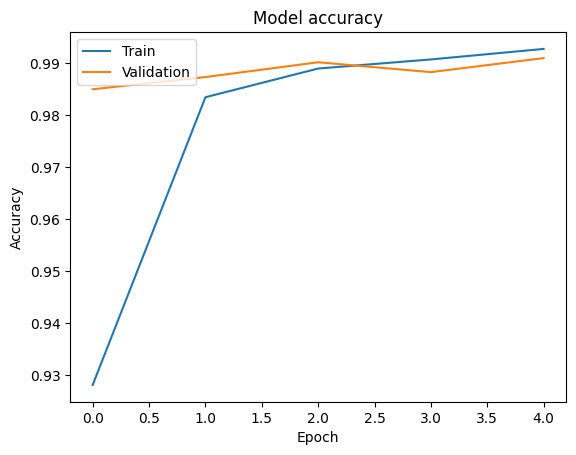

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

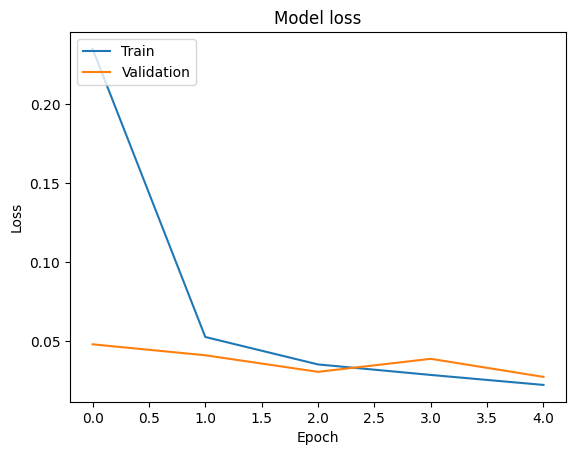

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print("Evaluate on train data")
Yhat = model.predict(train_images_rgb)
predicted_classes = np.argmax(Yhat, axis=1)
acc = np.mean(predicted_classes == train_labels)
print("The train accuracy rate is:", acc * 100)

Evaluate on train data
3750/3750 [==============================] - 8s 2ms/step
The train accuracy rate is: 99.62583333333333


In [ ]:
print("Evaluate on test data")
Yhat_test = model.predict(test_images_rgb)
predicted_classes = np.argmax(Yhat_test, axis=1)
acc = np.mean(predicted_classes == test_labels)
print("The test accuracy rate is:", acc * 100)

Evaluate on test data
625/625 [==============================] - 1s 2ms/step
The test accuracy rate is: 99.1


In [10]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (28, 28), interpolation=cv2.INTER_CUBIC)

In [ ]:
def predict_and_display(file_path):
    test_image = read_image(file_path)
    X_img = test_image.reshape(-1, 28, 28, 3) / 255 

    prediction = model.predict(X_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    prediction_confidence = np.max(prediction)

    print(f"Predicted Class: {predicted_class}, Confidence: {prediction_
    plt.imshow(cv2.cvtColor(test_image.astype('uint8'), cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

1/1 [==============================] - 0s 18ms/step
Predicted Class: 1, Confidence: 99.84%


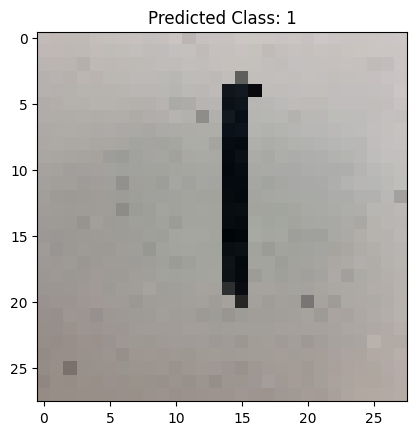

1/1 [==============================] - 0s 18ms/step
Predicted Class: 3, Confidence: 98.23%


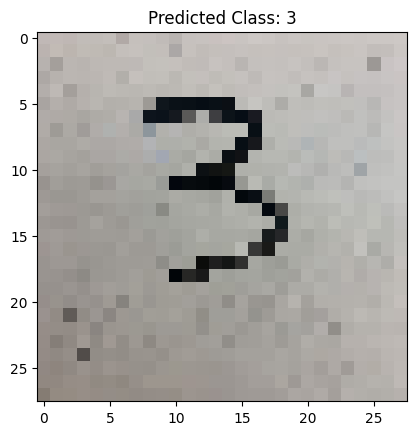

1/1 [==============================] - 0s 20ms/step
Predicted Class: 4, Confidence: 99.84%


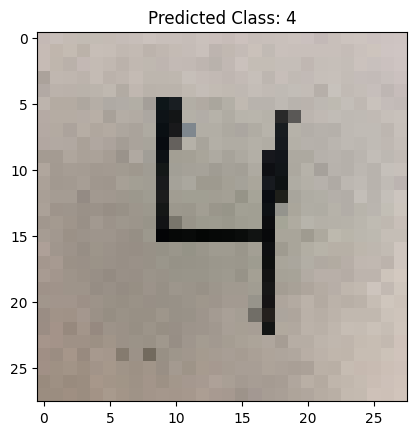

1/1 [==============================] - 0s 20ms/step
Predicted Class: 6, Confidence: 98.26%


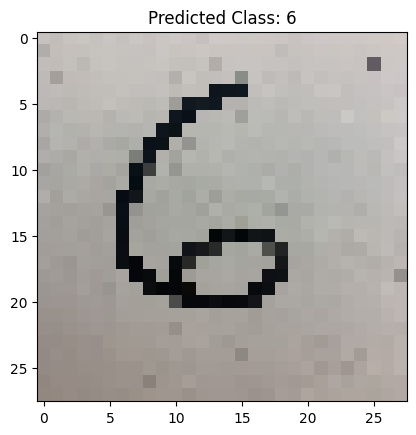

1/1 [==============================] - 0s 21ms/step
Predicted Class: 7, Confidence: 98.89%


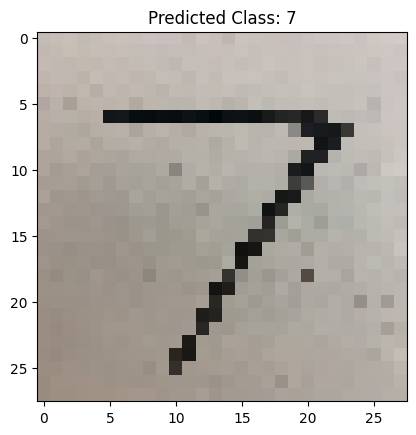

1/1 [==============================] - 0s 30ms/step
Predicted Class: 7, Confidence: 99.62%


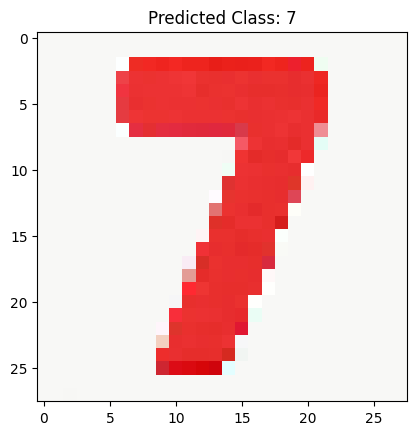

In [14]:
predict_and_display('/content/1.jpg')
predict_and_display('/content/3.jpg')
predict_and_display('/content/4.jpg')
predict_and_display('/content/6.jpg')
predict_and_display('/content/7.jpg')
predict_and_display('/content/7red.jpg')